In [62]:
import json
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import Counter, defaultdict
%matplotlib inline

In [63]:
with open('input22', 'r') as f:
    lines = [l.strip() for l in f.readlines()]

## Part 1

In [5]:
lines = [
    'on x=-20..26,y=-36..17,z=-47..7',
    'on x=-20..33,y=-21..23,z=-26..28',
    'on x=-22..28,y=-29..23,z=-38..16',
    'on x=-46..7,y=-6..46,z=-50..-1',
    'on x=-49..1,y=-3..46,z=-24..28',
    'on x=2..47,y=-22..22,z=-23..27',
    'on x=-27..23,y=-28..26,z=-21..29',
    'on x=-39..5,y=-6..47,z=-3..44',
    'on x=-30..21,y=-8..43,z=-13..34',
    'on x=-22..26,y=-27..20,z=-29..19',
    'off x=-48..-32,y=26..41,z=-47..-37',
    'on x=-12..35,y=6..50,z=-50..-2',
    'off x=-48..-32,y=-32..-16,z=-15..-5',
    'on x=-18..26,y=-33..15,z=-7..46',
    'off x=-40..-22,y=-38..-28,z=23..41',
    'on x=-16..35,y=-41..10,z=-47..6',
    'off x=-32..-23,y=11..30,z=-14..3',
    'on x=-49..-5,y=-3..45,z=-29..18',
    'off x=18..30,y=-20..-8,z=-3..13',
    'on x=-41..9,y=-7..43,z=-33..15',
#     'on x=-54112..-39298,y=-85059..-49293,z=-27449..7877',
#     'on x=967..23432,y=45373..81175,z=27513..53682',
]

In [6]:
steps = []
for line in lines: #lines[:20]:  # Just steps within [-50, 50]
    state, coords = line.split()
    state = 1 if state == 'on' else 0
    ranges = []
    for coord in coords.split(','):
        _, range_ = coord.split('=')
        ranges.append(tuple(int(v) for v in range_.split('..')))
    steps.append((state, ranges))

In [7]:
xrange, yrange, zrange = np.arange(-50, 51), np.arange(-50, 51), np.arange(-50, 51)
cubes = np.zeros((len(xrange), len(yrange), len(zrange)))

for step in steps:
    state, ranges = step
    x, y, z = ranges
    x = np.clip(x, -50, 50) + 50
    y = np.clip(y, -50, 50) + 50
    z = np.clip(z, -50, 50) + 50
    cubes[x[0]:x[1]+1, y[0]:y[1]+1, z[0]:z[1]+1] = state
print(int(cubes.sum()))

590784


## Part 2

In [88]:
lines = [
    'on x=-5..47,y=-31..22,z=-19..33',
    'on x=-44..5,y=-27..21,z=-14..35',
    'on x=-49..-1,y=-11..42,z=-10..38',
    'on x=-20..34,y=-40..6,z=-44..1',
    'off x=26..39,y=40..50,z=-2..11',
    'on x=-41..5,y=-41..6,z=-36..8',
    'off x=-43..-33,y=-45..-28,z=7..25',
    'on x=-33..15,y=-32..19,z=-34..11',
    'off x=35..47,y=-46..-34,z=-11..5',
    'on x=-14..36,y=-6..44,z=-16..29',
    'on x=-57795..-6158,y=29564..72030,z=20435..90618',
    'on x=36731..105352,y=-21140..28532,z=16094..90401',
    'on x=30999..107136,y=-53464..15513,z=8553..71215',
    'on x=13528..83982,y=-99403..-27377,z=-24141..23996',
    'on x=-72682..-12347,y=18159..111354,z=7391..80950',
    'on x=-1060..80757,y=-65301..-20884,z=-103788..-16709',
    'on x=-83015..-9461,y=-72160..-8347,z=-81239..-26856',
    'on x=-52752..22273,y=-49450..9096,z=54442..119054',
    'on x=-29982..40483,y=-108474..-28371,z=-24328..38471',
    'on x=-4958..62750,y=40422..118853,z=-7672..65583',
    'on x=55694..108686,y=-43367..46958,z=-26781..48729',
    'on x=-98497..-18186,y=-63569..3412,z=1232..88485',
    'on x=-726..56291,y=-62629..13224,z=18033..85226',
    'on x=-110886..-34664,y=-81338..-8658,z=8914..63723',
    'on x=-55829..24974,y=-16897..54165,z=-121762..-28058',
    'on x=-65152..-11147,y=22489..91432,z=-58782..1780',
    'on x=-120100..-32970,y=-46592..27473,z=-11695..61039',
    'on x=-18631..37533,y=-124565..-50804,z=-35667..28308',
    'on x=-57817..18248,y=49321..117703,z=5745..55881',
    'on x=14781..98692,y=-1341..70827,z=15753..70151',
    'on x=-34419..55919,y=-19626..40991,z=39015..114138',
    'on x=-60785..11593,y=-56135..2999,z=-95368..-26915',
    'on x=-32178..58085,y=17647..101866,z=-91405..-8878',
    'on x=-53655..12091,y=50097..105568,z=-75335..-4862',
    'on x=-111166..-40997,y=-71714..2688,z=5609..50954',
    'on x=-16602..70118,y=-98693..-44401,z=5197..76897',
    'on x=16383..101554,y=4615..83635,z=-44907..18747',
    'off x=-95822..-15171,y=-19987..48940,z=10804..104439',
    'on x=-89813..-14614,y=16069..88491,z=-3297..45228',
    'on x=41075..99376,y=-20427..49978,z=-52012..13762',
    'on x=-21330..50085,y=-17944..62733,z=-112280..-30197',
    'on x=-16478..35915,y=36008..118594,z=-7885..47086',
    'off x=-98156..-27851,y=-49952..43171,z=-99005..-8456',
    'off x=2032..69770,y=-71013..4824,z=7471..94418',
    'on x=43670..120875,y=-42068..12382,z=-24787..38892',
    'off x=37514..111226,y=-45862..25743,z=-16714..54663',
    'off x=25699..97951,y=-30668..59918,z=-15349..69697',
    'off x=-44271..17935,y=-9516..60759,z=49131..112598',
    'on x=-61695..-5813,y=40978..94975,z=8655..80240',
    'off x=-101086..-9439,y=-7088..67543,z=33935..83858',
    'off x=18020..114017,y=-48931..32606,z=21474..89843',
    'off x=-77139..10506,y=-89994..-18797,z=-80..59318',
    'off x=8476..79288,y=-75520..11602,z=-96624..-24783',
    'on x=-47488..-1262,y=24338..100707,z=16292..72967',
    'off x=-84341..13987,y=2429..92914,z=-90671..-1318',
    'off x=-37810..49457,y=-71013..-7894,z=-105357..-13188',
    'off x=-27365..46395,y=31009..98017,z=15428..76570',
    'off x=-70369..-16548,y=22648..78696,z=-1892..86821',
    'on x=-53470..21291,y=-120233..-33476,z=-44150..38147',
    'off x=-93533..-4276,y=-16170..68771,z=-104985..-24507',
]

In [3]:
lines = [
    'on x=-20..26,y=-36..17,z=-47..7',
    'on x=-20..33,y=-21..23,z=-26..28',
    'on x=-22..28,y=-29..23,z=-38..16',
    'on x=-46..7,y=-6..46,z=-50..-1',
    'on x=-49..1,y=-3..46,z=-24..28',
    'on x=2..47,y=-22..22,z=-23..27',
    'on x=-27..23,y=-28..26,z=-21..29',
    'on x=-39..5,y=-6..47,z=-3..44',
    'on x=-30..21,y=-8..43,z=-13..34',
    'on x=-22..26,y=-27..20,z=-29..19',
    'off x=-48..-32,y=26..41,z=-47..-37',
    'on x=-12..35,y=6..50,z=-50..-2',
    'off x=-48..-32,y=-32..-16,z=-15..-5',
    'on x=-18..26,y=-33..15,z=-7..46',
    'off x=-40..-22,y=-38..-28,z=23..41',
    'on x=-16..35,y=-41..10,z=-47..6',
    'off x=-32..-23,y=11..30,z=-14..3',
    'on x=-49..-5,y=-3..45,z=-29..18',
    'off x=18..30,y=-20..-8,z=-3..13',
    'on x=-41..9,y=-7..43,z=-33..15',
]

In [4]:
lines = [
    'on x=10..12,y=10..12,z=10..12',
    'on x=11..13,y=11..13,z=11..13',
    'off x=9..11,y=9..11,z=9..11',
    'on x=10..10,y=10..10,z=10..10',
]

In [5]:
steps = []
for line in lines:
    state, coords = line.split()
    state = 1 if state == 'on' else 0
    ranges = []
    for coord in coords.split(','):
        _, range_ = coord.split('=')
        ranges.append(tuple(int(v) for v in range_.split('..')))
    steps.append((state, ranges))

In [158]:
def range_size(r):
    x, y, z = r
    return (x[1] + 1 - x[0]) * (y[1] + 1 - y[0]) * (z[1] + 1 - z[0])

In [159]:
def range_intersection_size(r1, r2):
    intersection = range_intersection(r1, r2)
    if intersection:
        return range_size(intersection)
    else:
        return 0

In [160]:
def range_intersection(r1, r2):
    x1, y1, z1 = r1
    x2, y2, z2 = r2
    if (x1[0] <= x2[1] and x1[1] >= x2[0]) and (y1[0] <= y2[1] and y1[1] >= y2[0]) and (z1[0] <= z2[1] and z1[1] >= z2[0]):
        xi = [max(x1[0], x2[0]), min(x1[1], x2[1])]
        yi = [max(y1[0], y2[0]), min(y1[1], y2[1])]
        zi = [max(z1[0], z2[0]), min(z1[1], z2[1])]
        return (xi, yi, zi)
    else:
        return None

In [167]:
total_cubes = 0
on_steps = [s for s in steps if s[0] == 1]

# Sum on ranges
for step in on_steps:
    state, ranges = step
    total_cubes += range_size(ranges)

# Subtract pairwise intersections of on ranges
for i, step1 in enumerate(on_steps):
    for j, step2 in enumerate(on_steps):
        if i >= j:
            continue
        state1, ranges1 = step1
        state2, ranges2 = step2
        print(range_intersection_size(ranges1, ranges2))
        total_cubes -= range_intersection_size(ranges1, ranges2)

# Add back interesection of all on ranges
intersection = on_steps[0][1]
for step in on_steps[1:]:
    intersection = range_intersection(intersection, step[1])
    print(intersection)
    if intersection is None:
        break
if intersection:
    total_cubes += range_size(intersection)

print(total_cubes)

8
1
0
([11, 12], [11, 12], [11, 12])
None
46


In [93]:
combo_results = []
for i, step1 in enumerate(steps):
    for j, step2 in enumerate(steps):
        if i >= j:
            continue
        state1, ranges1 = step1
        state2, ranges2 = step2
        size1 = range_size(ranges1[0], ranges1[1], ranges1[2])
        size2 = range_size(ranges2[0], ranges2[1], ranges2[2])
        intersection = range_intersection(ranges1[0], ranges1[1], ranges1[2], ranges2[0], ranges2[1], ranges2[2])
        print(i, j, intersection)
#         if state1 == state2 and state1 == 0:
#             continue
#         elif state1 == state2 and state2 == 1:
#             combo_results.append(size1 + size2 - intersection)
#         elif state1 == 1 and state2 == 0:
#             combo_results.append(size1 - intersection)
#         elif state1 == 0 and state2 == 1:
#             combo_results.append(size2 - intersection)
# print(sum(combo_results))

0 1 62322
0 2 101614
0 3 31584
0 4 14784
0 5 31000
0 6 58696
0 7 6864
0 8 22932
0 9 78255
0 10 0
0 11 21528
0 12 0
0 13 33075
0 14 0
0 15 109134
0 16 0
0 17 12432
0 18 1287
0 19 30750
1 2 94815
1 3 21840
1 4 31482
1 5 71808
1 6 99000
1 7 24960
1 8 56448
1 9 90804
1 10 0
1 11 20700
1 12 0
1 13 59940
1 14 0
1 15 52800
1 16 0
1 17 19440
1 18 2873
1 19 39060
2 3 34200
2 4 26568
2 5 48600
2 6 90896
2 7 16800
2 8 42240
2 9 108192
2 10 0
2 11 27306
2 12 0
2 13 48600
2 14 0
2 15 81000
2 16 0
2 17 22356
2 18 2431
2 19 48608
3 4 57600
3 5 4002
3 6 24255
3 7 7155
3 8 24700
3 9 23490
3 10 2640
3 11 40180
3 12 0
3 13 4004
3 14 0
3 15 19176
3 16 2800
3 17 59682
3 18 0
3 19 80850
4 5 0
4 6 43500
4 7 65600
4 8 63168
4 9 25344
4 10 0
4 11 13202
4 12 0
4 13 13680
4 14 0
4 15 7812
4 16 3600
4 17 94815
4 18 0
4 19 80840
5 6 48510
5 7 3596
5 8 25420
5 9 46225
5 10 0
5 11 12716
5 12 0
5 13 33250
5 14 0
5 15 33660
5 16 0
5 17 0
5 18 2873
5 19 9360
6 7 35937
6 8 73745
6 9 90528
6 10 0
6 11 15120
6 12 0
6 13 6

## 2D Example

In [3]:
def range_area(r):
    x, y = r
    if x[1] <= x[0]:
        return 0
    if y[1] <= y[0]:
        return 0
    return (x[1] - x[0]) * (y[1] - y[0])

In [4]:
orig_steps = [
    (1, [(1, 4+1), (2, 5+1)]),
    (1, [(2, 5+1), (-1, 3+1)]),
    (1, [(4, 6+1), (3, 6+1)]),
    (0, [(3, 8), (-2, 1)])
]

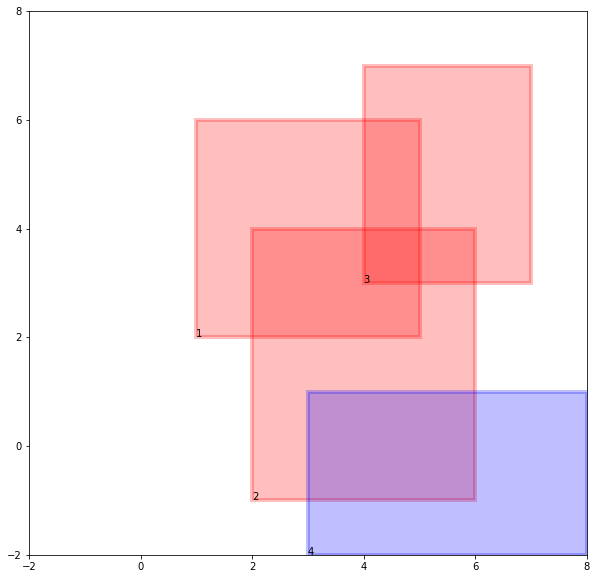

In [5]:
ax = plt.figure(figsize=(10, 10)).add_subplot(111)

for i, step in enumerate(orig_steps):
    state, ranges = step
    x, y = ranges
    ax.add_patch(Rectangle(
        (x[0], y[0]), x[1] - x[0], y[1] - y[0],
        color='red' if state == 1 else 'blue',
        alpha=0.25,
        linewidth=4
    ))
    ax.text(x[0], y[0], str(i+1))
ax.plot([0, 0], [0, 0])
ax.set(xlim=[-2, 8], ylim=[-2, 8]);

In [74]:
lines = [
    'on x=-20..26,y=-36..17,z=-47..7',
    'on x=-20..33,y=-21..23,z=-26..28',
    'on x=-22..28,y=-29..23,z=-38..16',
    'on x=-46..7,y=-6..46,z=-50..-1',
    'on x=-49..1,y=-3..46,z=-24..28',
    'on x=2..47,y=-22..22,z=-23..27',
    'on x=-27..23,y=-28..26,z=-21..29',
    'on x=-39..5,y=-6..47,z=-3..44',
    'on x=-30..21,y=-8..43,z=-13..34',
    'on x=-22..26,y=-27..20,z=-29..19',
    'off x=-48..-32,y=26..41,z=-47..-37',
    'on x=-12..35,y=6..50,z=-50..-2',
    'off x=-48..-32,y=-32..-16,z=-15..-5',
    'on x=-18..26,y=-33..15,z=-7..46',
    'off x=-40..-22,y=-38..-28,z=23..41',
    'on x=-16..35,y=-41..10,z=-47..6',
    'off x=-32..-23,y=11..30,z=-14..3',
    'on x=-49..-5,y=-3..45,z=-29..18',
    'off x=18..30,y=-20..-8,z=-3..13',
    'on x=-41..9,y=-7..43,z=-33..15',
]

In [75]:
steps = []
for i, line in enumerate(lines):
    state, coords = line.split()
    state = 1 if state == 'on' else 0
    ranges = []
    for coord in coords.split(',')[:2]:
        _, range_ = coord.split('=')
        ranges.append(tuple(int(v) for v in range_.split('..')))
    steps.append((state, ranges, i))
print(steps)

[(1, [(-20, 26), (-36, 17)], 0), (1, [(-20, 33), (-21, 23)], 1), (1, [(-22, 28), (-29, 23)], 2), (1, [(-46, 7), (-6, 46)], 3), (1, [(-49, 1), (-3, 46)], 4), (1, [(2, 47), (-22, 22)], 5), (1, [(-27, 23), (-28, 26)], 6), (1, [(-39, 5), (-6, 47)], 7), (1, [(-30, 21), (-8, 43)], 8), (1, [(-22, 26), (-27, 20)], 9), (0, [(-48, -32), (26, 41)], 10), (1, [(-12, 35), (6, 50)], 11), (0, [(-48, -32), (-32, -16)], 12), (1, [(-18, 26), (-33, 15)], 13), (0, [(-40, -22), (-38, -28)], 14), (1, [(-16, 35), (-41, 10)], 15), (0, [(-32, -23), (11, 30)], 16), (1, [(-49, -5), (-3, 45)], 17), (0, [(18, 30), (-20, -8)], 18), (1, [(-41, 9), (-7, 43)], 19)]


In [76]:
orig_steps = steps
# for line in lines
    

# orig_steps = [
#     (1, [(1, 4+1), (2, 5+1)], 0),
#     (1, [(2, 5+1), (-1, 3+1)], 1),
#     (0, [(3, 5+1), (5, 6+1)], 2),
#     (1, [(4, 6+1), (3, 6+1)], 3),
#     (0, [(3, 7+1), (-2, 0+1)], 4),
#     (0, [(0, 3+1), (-1, 0+1)], 5),
# ]

steps = orig_steps

found_intersections = True
while found_intersections:
    found_intersections = False
    new_steps = []
    steps_split = []
    for i, step1 in enumerate(steps):
        for j, step2 in enumerate(steps):
            if i >= j:
                continue

            state1, ranges1, seq1 = step1
            x1, y1 = ranges1
            state2, ranges2, seq2 = step2
            x2, y2 = ranges2
            
            if found_intersections:
                if i not in steps_split:
                    new_steps.append(step1)
                if j not in steps_split:
                    new_steps.append(step2)
                continue

            # Intersection
            xi = [max(x1[0], x2[0]), min(x1[1], x2[1])]
            yi = [max(y1[0], y2[0]), min(y1[1], y2[1])]
            if range_area((xi, yi)) > 0 and (range_area((xi, yi)) != range_area(ranges2) or state1 == state2):
                # print(xi, yi)
                # print(f'{iteration}: {step1} ({i+1}) and {step2} ({j+1}) overlap')
                found_intersections = True
                if state1 != state2:
                    if seq1 > seq2:
                        new_steps.append((state1, [xi, yi], seq1))
                    else:
                        new_steps.append((state2, [xi, yi], seq2))
                else:
                    new_steps.append((state1, [xi, yi], max(seq1, seq2)))
                steps_split.extend([i, j])
            else:
                new_steps.extend([step1, step2])
                continue

            # y-aligned portion at lower x
            xi = [min(x1[0], x2[0]), max(x1[0], x2[0])]
            yi = [max(y1[0], y2[0]), min(y1[1], y2[1])]
            new_state = state1 if min(x1[0], x2[0]) == x1[0] else state2
            new_seq = seq1 if min(x1[0], x2[0]) == x1[0] else seq2
            if range_area((xi, yi)) > 0:
                new_steps.append((new_state, [xi, yi], new_seq))

            # y-aligned portion at higher x
            xi = [min(x1[1], x2[1]), max(x1[1], x2[1])]
            yi = [max(y1[0], y2[0]), min(y1[1], y2[1])]
            new_state = state1 if max(x1[1], x2[1]) == x1[1] else state2
            new_seq = seq1 if max(x1[1], x2[1]) == x1[1] else seq2
            if range_area((xi, yi)) > 0:
                new_steps.append((new_state, [xi, yi], new_seq))

            # remainder of lower y range
            xi = x1 if min(y1[0], y2[0]) == y1[0] else x2
            yi = [min(y1[0], y2[0]), max(y1[0], y2[0])]
            new_state = state1 if min(y1[0], y2[0]) == y1[0] else state2
            new_seq = seq1 if min(y1[0], y2[0]) == y1[0] else seq2
            if range_area((xi, yi)) > 0:
                new_steps.append((new_state, [xi, yi], new_seq))

            # remainder of higher y range
            xi = x1 if max(y1[1], y2[1]) == y1[1] else x2
            yi = [min(y1[1], y2[1]), max(y1[1], y2[1])]
            new_state = state1 if max(y1[1], y2[1]) == y1[1] else state2
            new_seq = seq1 if max(y1[1], y2[1]) == y1[1]else seq2
            if range_area((xi, yi)) > 0:
                new_steps.append((new_state, [xi, yi], new_seq))
    
    # Remove split steps
    if len(steps_split) > 0:
        splits_removed = []
        for step in new_steps:
            state, ranges, seq = step
            x, y = ranges
            found = False
            for other in [steps[steps_split[0]], steps[steps_split[1]]]:
                state1, ranges1, seq1 = other
                x1, y1 = ranges1
                if state == state1 and x[0] == x1[0] and x[1] == x1[1] and y[0] == y1[0] and y[1] == y1[1]:
                    found = True
                    break
            if not found:
                splits_removed.append(step)
        new_steps = splits_removed

    deduped_steps = []
    for step in new_steps:
        state, ranges, seq = step
        x, y = ranges
        found = False
        for other in deduped_steps:
            state1, ranges1, seq1 = other
            x1, y1 = ranges1
            if state == state1 and x[0] == x1[0] and x[1] == x1[1] and y[0] == y1[0] and y[1] == y1[1]:
                found = True
                break
        if not found:
            deduped_steps.append(step)
    steps = deduped_steps
# print(len(steps))
# print(steps)

In [77]:
total_area = 0
for state, ranges, _ in steps:
    if state == 1:
        total_area += range_area(ranges)
print(total_area)

5172


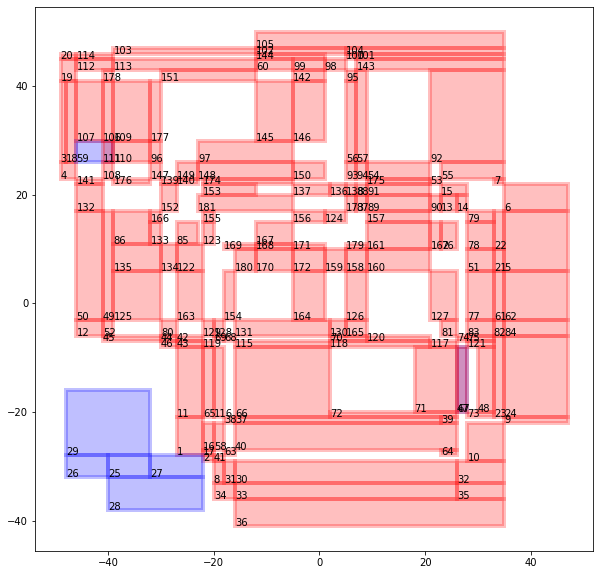

In [78]:
ax = plt.figure(figsize=(10, 10)).add_subplot(111)

for i, step in enumerate(steps):
    state, ranges, seq = step
    x, y = ranges
    ax.add_patch(Rectangle(
        (x[0], y[0]), x[1] - x[0], y[1] - y[0],
        color='red' if state == 1 else 'blue',
        alpha=0.25,
        linewidth=4
    ))
    ax.text(x[0], y[0], str(i+1))
ax.plot([0, 0], [0, 0]);
# ax.set(xlim=[-2, 8], ylim=[-2, 8]);

In [39]:
lines = [
    'on x=-20..26,y=-36..17,z=-47..7',
    'on x=-20..33,y=-21..23,z=-26..28',
    'on x=-22..28,y=-29..23,z=-38..16',
    'on x=-46..7,y=-6..46,z=-50..-1',
    'on x=-49..1,y=-3..46,z=-24..28',
    'on x=2..47,y=-22..22,z=-23..27',
    'on x=-27..23,y=-28..26,z=-21..29',
    'on x=-39..5,y=-6..47,z=-3..44',
    'on x=-30..21,y=-8..43,z=-13..34',
    'on x=-22..26,y=-27..20,z=-29..19',
    'off x=-48..-32,y=26..41,z=-47..-37',
    'on x=-12..35,y=6..50,z=-50..-2',
    'off x=-48..-32,y=-32..-16,z=-15..-5',
    'on x=-18..26,y=-33..15,z=-7..46',
    'off x=-40..-22,y=-38..-28,z=23..41',
    'on x=-16..35,y=-41..10,z=-47..6',
    'off x=-32..-23,y=11..30,z=-14..3',
    'on x=-49..-5,y=-3..45,z=-29..18',
    'off x=18..30,y=-20..-8,z=-3..13',
    'on x=-41..9,y=-7..43,z=-33..15',
#     'on x=-54112..-39298,y=-85059..-49293,z=-27449..7877',
#     'on x=967..23432,y=45373..81175,z=27513..53682',
]

In [40]:
steps = []
for line in lines: #lines[:20]:  # Just steps within [-50, 50]
    state, coords = line.split()
    state = 1 if state == 'on' else 0
    ranges = []
    for coord in coords.split(','):
        _, range_ = coord.split('=')
        ranges.append(tuple(int(v) for v in range_.split('..')))
    steps.append((state, ranges))

In [41]:
xrange, yrange = np.arange(-50, 51), np.arange(-50, 51)
cubes = np.zeros((len(xrange), len(yrange)))

for step in steps:
    state, ranges = step
    x, y, _ = ranges
    x = np.clip(x, -50, 50) + 50
    y = np.clip(y, -50, 50) + 50
    cubes[x[0]:x[1]+1, y[0]:y[1]+1] = state
print(int(cubes.sum()))

7192


## Sweep

In [8]:
lines = [
    'on x=10..12,y=10..12,z=10..12',
    'on x=11..13,y=11..13,z=11..13',
    'off x=9..11,y=9..11,z=9..11',
    'on x=10..10,y=10..10,z=10..10',
]

In [9]:
steps = []
for line in lines:
    state, coords = line.split()
    state = 1 if state == 'on' else 0
    ranges = []
    for coord in coords.split(','):
        _, range_ = coord.split('=')
        ranges.append(tuple(int(v) for v in range_.split('..')))
    steps.append((state, ranges))

In [15]:
xrange, yrange = np.arange(-50, 51), np.arange(-50, 51)
cubes = np.zeros((len(xrange), len(yrange)))

for step in steps:
    state, ranges = step
    x, y, _ = ranges
    x = np.clip(x, -50, 50) + 50
    y = np.clip(y, -50, 50) + 50
    cubes[x[0]:x[1]+1, y[0]:y[1]+1] = state
print(int(cubes.sum()))

11


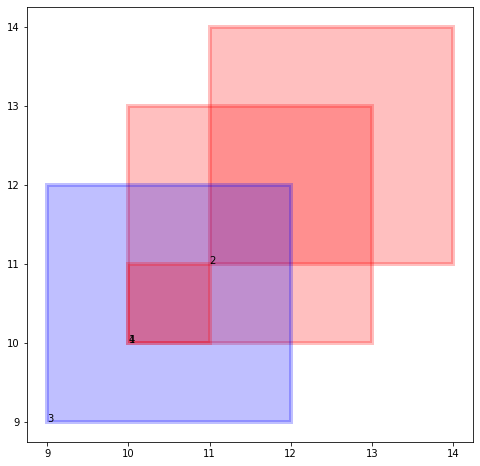

In [22]:
ax = plt.figure(figsize=(8, 8)).add_subplot(111)

for i, step in enumerate(steps):
    state, ranges = step
    x, y, _ = ranges
    ax.add_patch(Rectangle(
        (x[0], y[0]), x[1] - x[0] + 1, y[1] - y[0] + 1,
        color='red' if state == 1 else 'blue',
        alpha=0.25,
        linewidth=4
    ))
    ax.text(x[0], y[0], str(i+1))
ax.plot([10, 10], [10, 10]);

In [ ]:
endpoints = [
    (9, 'off', 'start', 2),
    (10, 'on', 'start', 0),
    (10, 'on', 'start', 3),
    (11, 'on', 'start', 1),
    (11, 'on', 'end', 3),
    (12, 'off', 'end', 2),
    (13, 'on', 'end', 0),
    (14, 'on', 'end', 1),
]
endpoints = sorted(endpoints, lambda e: (e[0], e[3]))

cur_on = None
cur_on_seq = None
cur_off = None
cur_off_seq = None
for x, state, se, seq in endpoints:
    if 

In [43]:
minx, maxx = 1e100, -1e100
for step in steps:
    _, ranges = step
    xr, _, _ = ranges
    if xr[0] < minx:
        minx = xr[0]
    if xr[1] > maxx:
        maxx = xr[1]

all_x_ranges = []
for x in range(minx, maxx + 1):
    x_ranges = []
    for i, step in enumerate(steps):
        state, ranges = step
        xr, yr, _ = ranges
        if xr[0] <= x <= xr[1]:
            x_ranges.append((state, xr, i))
    all_x_ranges.append(x_ranges)

In [61]:
endpoints = []
for i, xrange in enumerate(all_x_ranges[1]):
    state, xr, seq = xrange
    endpoints.append((xr[0], 0, state, seq, i))
    endpoints.append((xr[1], 1, state, seq, i))
endpoints = sorted(endpoints, key=lambda e: (e[0], e[1]))

le, re = 0, 0
last_zero = -1
last_state = endpoints[0][2]
supersets = []
for i, endpoint in enumerate(endpoints):
    x, se, state, seq, interval = endpoint
    if state != last_state:
        le, re = 0, 0
        supersets.append((endpoints[last_zero+1][0], x, last_state))
        last_zero = i
    if se == 0:
        le += 1
    elif se == 1:
        re += 1
    if le - re == 0:
        le, re = 0, 0
        supersets.append((endpoints[last_zero+1][0], x, state))
        last_zero = i
    last_state = state
print(supersets)

[(9, 10, 0), (10, 11, 1), (12, 12, 0)]
